# WeatherPy
----

#### Observations
* There is a strong relationship between a cities location relative to the equator and its maximum temperature, especially for those cities in the Northern Hemisphere
* The further away a city in the Northern Hemisphere is from the equator, the lower the max temperature.
* The humidity, cloudiness, and wind speed do not seem to be determined by a city's position relative to the equator. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Create lists to hold information
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

In [6]:
# Create variables to track record and set number
set_num = 1
record = 0

print("Beginning Data Retrieval\n-----------------------------")

# Loop through the list of cities and try to perform a request for data on each
for place in cities:
    try:
        response = requests.get(query_url + place).json()
        city_name.append(response['name']) 
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record = record + 1
        
        # Update record number and set number once count reaches 50
        if record == 50:
            set_num = set_num + 1
            record = 0
        print(f"Processing Record {record} of Set {set_num} | {place}")
        
    except:
        print(f"City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | thaba-tseka
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | rawson
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | ileza
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | lom sak
Processing Record 18 of Set 1 | mikhaylovka
Processing Record 19 of Set 1 | nishihara
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | gazanjyk
Processing Record 22 of Set 1 | oriximina
Processing Record 23 of Set 1 |

Processing Record 39 of Set 4 | marawi
Processing Record 40 of Set 4 | iranshahr
Processing Record 41 of Set 4 | laon
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | gimli
Processing Record 44 of Set 4 | iralaya
City not found. Skipping...
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | monopoli
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | luanda
Processing Record 0 of Set 5 | igarka
Processing Record 1 of Set 5 | atlantic city
Processing Record 2 of Set 5 | devesel
Processing Record 3 of Set 5 | querendaro
Processing Record 4 of Set 5 | rincon
Processing Record 5 of Set 5 | dikson
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | luderitz
Processing Record 8 of Set 5 | rio grande
Processing Record 9 of Set 5 | sao paulo de olivenca
Processing Record 10 of Set 5 | cap malheureux
Processing Record 11 of Set 5 | ostrovnoy
Processing Record 12 of Set 

Processing Record 28 of Set 8 | prince rupert
Processing Record 29 of Set 8 | westport
Processing Record 30 of Set 8 | pontianak
Processing Record 31 of Set 8 | iracoubo
Processing Record 32 of Set 8 | sokoni
Processing Record 33 of Set 8 | khatra
Processing Record 34 of Set 8 | gejiu
Processing Record 35 of Set 8 | pyinmana
Processing Record 36 of Set 8 | olavarria
Processing Record 37 of Set 8 | viedma
Processing Record 38 of Set 8 | jiayuguan
Processing Record 39 of Set 8 | nanortalik
Processing Record 40 of Set 8 | ketchikan
Processing Record 41 of Set 8 | verkhnyachka
Processing Record 42 of Set 8 | oudtshoorn
Processing Record 43 of Set 8 | gamba
Processing Record 44 of Set 8 | svobodnyy
City not found. Skipping...
Processing Record 45 of Set 8 | marivan
Processing Record 46 of Set 8 | zhigansk
Processing Record 47 of Set 8 | buin
Processing Record 48 of Set 8 | la ronge
Processing Record 49 of Set 8 | dorna
Processing Record 0 of Set 9 | itarema
Processing Record 1 of Set 9 | pa

City not found. Skipping...
Processing Record 18 of Set 12 | charters towers
Processing Record 19 of Set 12 | aktau
Processing Record 20 of Set 12 | sobolevo
Processing Record 21 of Set 12 | copiapo
Processing Record 22 of Set 12 | geraldton
Processing Record 23 of Set 12 | tura
Processing Record 24 of Set 12 | deer lake
City not found. Skipping...
Processing Record 25 of Set 12 | biak
Processing Record 26 of Set 12 | ornskoldsvik
Processing Record 27 of Set 12 | vegachi
Processing Record 28 of Set 12 | lorengau
Processing Record 29 of Set 12 | kang
City not found. Skipping...
Processing Record 30 of Set 12 | lexington
Processing Record 31 of Set 12 | punta gorda
Processing Record 32 of Set 12 | nacogdoches
Processing Record 33 of Set 12 | christchurch
City not found. Skipping...
Processing Record 34 of Set 12 | santiago
Processing Record 35 of Set 12 | bardiyah
Processing Record 36 of Set 12 | araouane
Processing Record 37 of Set 12 | shirokiy
City not found. Skipping...
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a DataFrame
orig_df = pd.DataFrame({"City" : city_name,
                         "Lat" : latitude,
                          "Lng" : longitude,
                          "Max Temp" : max_temp,
                          "Humidity" : humidity,
                          "Cloudiness" : clouds,
                          "Wind Speed" : wind_speed,
                          "Country" : country,
                          "Date" : date})

# Save DataFrame to CSV
orig_df.to_csv(output_data_file, index=False, header=True)

orig_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,33.01,86,90,32.21,CA,1612901282
1,Albany,42.6001,-73.9662,28.00,87,100,3.06,US,1612901116
2,Vaini,-21.2000,-175.2000,80.60,89,90,21.85,TO,1612901274
3,Thaba-Tseka,-29.5220,28.6084,57.85,72,100,1.10,LS,1612901544
4,Butaritari,3.0707,172.7902,80.89,83,5,16.55,KI,1612901267


In [8]:
# Get descriptive statistics of the DataFrame
orig_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,21.319162,19.355849,49.030795,72.705584,53.126904,8.048629,1.612901e+09
std,33.069297,90.526642,32.837306,19.447921,40.595973,6.175701,1.400978e+02
min,-54.800000,-179.166700,-38.200000,13.000000,0.000000,0.360000,1.612901e+09
25%,-4.479050,-61.068450,25.945000,63.000000,7.000000,3.580000,1.612901e+09
50%,26.184200,22.787600,61.070000,78.000000,59.000000,6.910000,1.612902e+09
75%,49.101950,102.345700,77.000000,87.000000,96.500000,10.435000,1.612902e+09
max,78.218600,179.316700,94.390000,100.000000,100.000000,57.000000,1.612902e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Create a new DataFrame for the cities with humidity > 100%
high_humidity_df = orig_df[orig_df['Humidity'] > 100]

In [10]:
#  Get the indices of cities that have humidity over 100%.
index = list(high_humidity_df.index.values)
index

[]

In [11]:
# Create a clean DataFrame by dropping cities with inaccurate humidity values
city_data_df = orig_df.drop(high_humidity_df.index, inplace = False)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,33.01,86,90,32.21,CA,1612901282
1,Albany,42.6001,-73.9662,28.00,87,100,3.06,US,1612901116
2,Vaini,-21.2000,-175.2000,80.60,89,90,21.85,TO,1612901274
3,Thaba-Tseka,-29.5220,28.6084,57.85,72,100,1.10,LS,1612901544
4,Butaritari,3.0707,172.7902,80.89,83,5,16.55,KI,1612901267


In [12]:
# Get descriptive statistics of the DataFrame
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,21.319162,19.355849,49.030795,72.705584,53.126904,8.048629,1.612901e+09
std,33.069297,90.526642,32.837306,19.447921,40.595973,6.175701,1.400978e+02
min,-54.800000,-179.166700,-38.200000,13.000000,0.000000,0.360000,1.612901e+09
25%,-4.479050,-61.068450,25.945000,63.000000,7.000000,3.580000,1.612901e+09
50%,26.184200,22.787600,61.070000,78.000000,59.000000,6.910000,1.612902e+09
75%,49.101950,102.345700,77.000000,87.000000,96.500000,10.435000,1.612902e+09
max,78.218600,179.316700,94.390000,100.000000,100.000000,57.000000,1.612902e+09


In [13]:
# Extract date value and assign to a variable
date_orig_df = city_data_df
date_time_values = pd.to_datetime(date_orig_df['Date'],unit='s')
date_values = date_time_values.dt.date
date = date_values[0]
date = date.strftime('%m/%d/%y')
date

'02/09/21'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

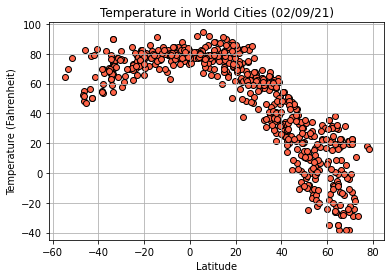

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color = 'tomato', edgecolors = 'black')

# Label plot
plt.title(f"Temperature in World Cities ({date})")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/TemperatureInWorldCities.png")

# Show plot
plt.show()

This graph plots the maximum temperature for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the maximum temperature (F) in a city as compared to its position relative to the equator. Countries in the Northern Hemisphere appear to have lower temperatures than those in the Southern Hemisphere. 

## Latitude vs. Humidity Plot

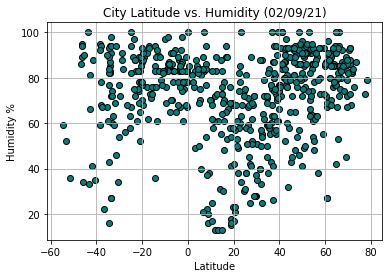

In [15]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color = 'teal', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

This graph plots the humidity for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the humidity (%) in a city as compared to its position relative to the equator. A city's relative position does not appear to determine its humidity levels.

## Latitude vs. Cloudiness Plot

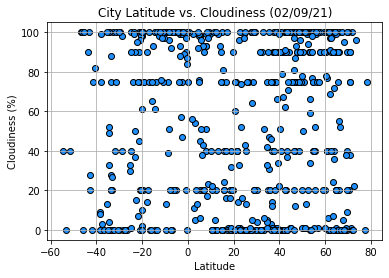

In [16]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color = 'dodgerblue', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

This graph plots the cloudiness percentage for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the cloudiness (%) in a city as compared to its position relative to the equator. A city's position does not appear to determine its cloudiness levels.

## Latitude vs. Wind Speed Plot

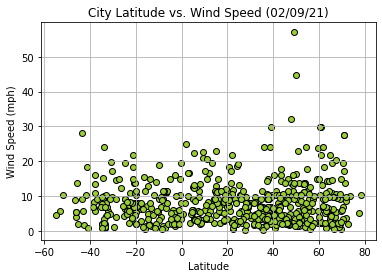

In [17]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color = 'yellowgreen', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()

This graph plots the wind speed for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the wind speed (mph) in a city as compared to its position relative to the equator.

## Linear Regression

In [18]:
# Create df for Northern Hemisphere and Southern Hemisphere
northern_hem_df = city_data_df[city_data_df['Lat'] > 0]
southern_hem_df = city_data_df[city_data_df['Lat'] < 0]

In [28]:
# Create a Function to create Linear Plots using given variables
def linearplot(x_values, y_values, y_titles, plttitle, coordinates, color):
    
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values, color = color, edgecolor = 'black')
    plt.plot(x_values,regress_values, "red")

    # Label plot
    plt.title(plttitle)
    plt.xlabel('Latitude')
    plt.ylabel(y_titles)
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7711734458901988


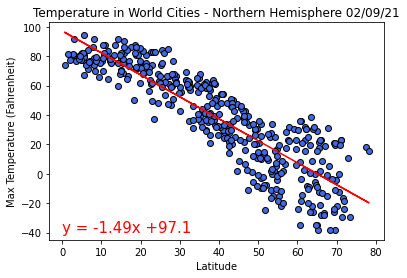

In [44]:
# Define variables for this graph
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Max Temp']
plttitle = f"Temperature in World Cities - Northern Hemisphere {date}"
y_titles = 'Max Temperature (Fahrenheit)'
coordinates = (0, -40)
color = 'royalblue'

# Call function
linearplot(x_values, y_values, y_titles, plttitle, coordinates, color)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3451036320508141


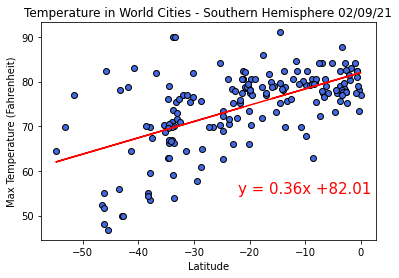

In [42]:
# Define variables for this graph
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Max Temp']
plttitle = f"Temperature in World Cities - Southern Hemisphere {date}"
y_titles = 'Max Temperature (Fahrenheit)'
coordinates = (-22, 55)
color = 'royalblue'

# Call function
linearplot(x_values, y_values, y_titles, plttitle, coordinates, color)

The graphs above study the relationship between a city's position relative to the equator and its maximum temperature. The data is divided into the northern and southern hemisphere to make it easier to identify trends. From this analysis, there appears to be a strong linear relationship between the observed and predicted values for cities in the northern hemisphere. This is evident in the r value of 0.77. The temperatures in the southern hemisphere, on the other hand, have an r value of 0.35. This indicates that there is a weak relationship between the observed and predicted values. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13959036711974743


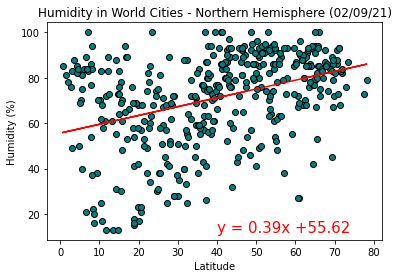

In [31]:
# Define variables for this graph
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Humidity']
plttitle = f"Humidity in World Cities - Northern Hemisphere ({date})"
y_titles = 'Humidity (%)'
coordinates = (40,12)
color = 'teal'

# Call function
linearplot(x_values, y_values, y_titles, plttitle, coordinates, color)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07838558370291278


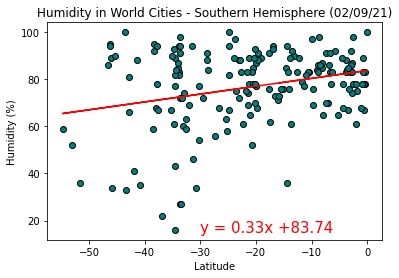

In [33]:
# Define variables for this graph
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Humidity']
plttitle = f"Humidity in World Cities - Southern Hemisphere ({date})"
y_titles = 'Humidity (%)'
coordinates = (-30,15)
color = 'teal'

# Call function
linearplot(x_values, y_values, y_titles, plttitle, coordinates, color)

There appears to be a weak linear relationship between the predicted and observed humidity levels for cities across both hemispheres. The model for cities in the northern hemisphere has an r value of 0.14 and that in the southern hemisphere has an r value of 0.08. These indicate that there is little to no relationship between the actual humidity levels and those predicted by the model. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0167159422898777


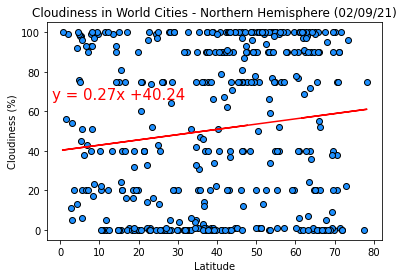

In [37]:
# Define variables for this graph
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Cloudiness']
plttitle = f"Cloudiness in World Cities - Northern Hemisphere ({date})"
y_titles = 'Cloudiness (%)'
coordinates = (-2,66)
color = 'dodgerblue'

# Call function
linearplot(x_values, y_values, y_titles, plttitle, coordinates, color)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10813231656504277


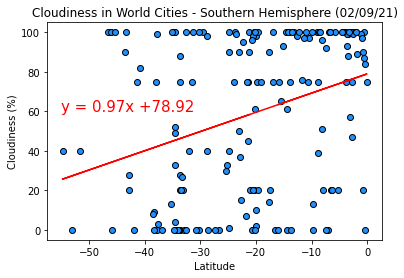

In [40]:
# Define variables for this graph
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Cloudiness']
plttitle = f"Cloudiness in World Cities - Southern Hemisphere ({date})"
y_titles = 'Cloudiness (%)'
coordinates = (-55,60)
color = 'dodgerblue'

# Call function
linearplot(x_values, y_values, y_titles, plttitle, coordinates, color)

There appears to be a weak linear relationship between the cloudiness levels in a city and those predicted by the model. The r value for the model in the northern hemisphere is 0.02 and that in the southern hemisphere is 0.11. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0005532314703119296


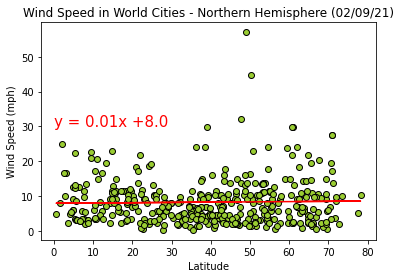

In [46]:
# Define variables for this graph
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Wind Speed']
plttitle = f"Wind Speed in World Cities - Northern Hemisphere ({date})"
y_titles = 'Wind Speed (mph)'
coordinates = (0,30)
color = 'yellowgreen'

# Call function
linearplot(x_values, y_values, y_titles, plttitle, coordinates, color)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.015291840718191436


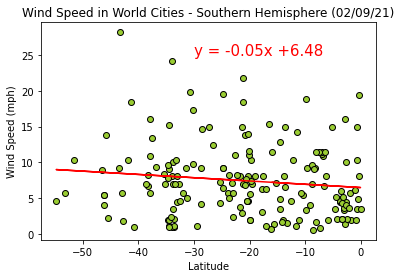

In [49]:
# Define variables for this graph
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Wind Speed']
plttitle = f"Wind Speed in World Cities - Southern Hemisphere ({date})"
y_titles = 'Wind Speed (mph)'
coordinates = (-30, 25)
color = 'yellowgreen'

# Call function
linearplot(x_values, y_values, y_titles, plttitle, coordinates, color)

There appears to be little to no linear relationship between the wind speed in a given city and those predicted by the model. The r value for the northern hemisphere is 0.0006 and that for the southern hemisphere is 0.015.